In [ ]:
# Complete Working v1 predictions - Working with DAX

Epoch 1/10
26/26 [==============================] - 27s 1s/step - loss: 0.4585
Epoch 2/10
26/26 [==============================] - 2s 76ms/step - loss: 0.3501
Epoch 3/10
26/26 [==============================] - 2s 95ms/step - loss: 0.2522
Epoch 4/10
26/26 [==============================] - 3s 105ms/step - loss: 0.1647
Epoch 5/10
26/26 [==============================] - 4s 146ms/step - loss: 0.0900
Epoch 6/10
26/26 [==============================] - 1s 38ms/step - loss: 0.0335
Epoch 7/10
26/26 [==============================] - 1s 44ms/step - loss: 0.0045
Epoch 8/10
26/26 [==============================] - 1s 43ms/step - loss: 0.0132
Epoch 9/10
26/26 [==============================] - 1s 50ms/step - loss: 0.0459
Epoch 10/10
26/26 [==============================] - 3s 105ms/step - loss: 0.0614
Root Mean Squared Error: 29.393224633619354


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


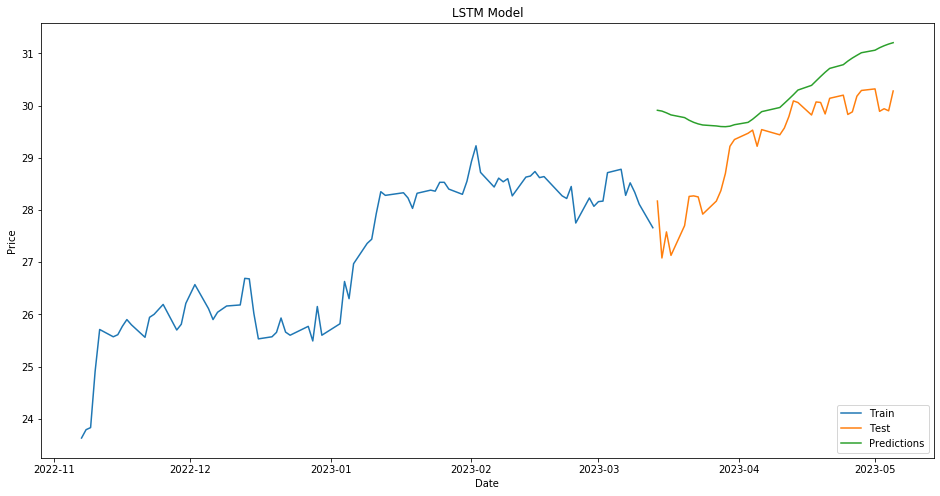

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training data
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
x_train, y_train = [], []
for i in range(60, train_size):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create testing data
test_data = scaled_data[train_size-60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile and fit model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Plot results
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# Complete Working v2 predictions - Working with DAX

Epoch 1/10
26/26 [==============================] - 31s 1s/step - loss: 0.2072
Epoch 2/10
26/26 [==============================] - 3s 99ms/step - loss: 0.1165
Epoch 3/10
26/26 [==============================] - 3s 103ms/step - loss: 0.0525
Epoch 4/10
26/26 [==============================] - 2s 85ms/step - loss: 0.0072
Epoch 5/10
26/26 [==============================] - 1s 52ms/step - loss: 0.0142
Epoch 6/10
26/26 [==============================] - 1s 55ms/step - loss: 0.0470
Epoch 7/10
26/26 [==============================] - 2s 61ms/step - loss: 0.0464
Epoch 8/10
26/26 [==============================] - 2s 67ms/step - loss: 0.0269
Epoch 9/10
26/26 [==============================] - 2s 87ms/step - loss: 0.0099
Epoch 10/10
26/26 [==============================] - 2s 82ms/step - loss: 0.0027
Root Mean Squared Error: 27.58579008911143


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


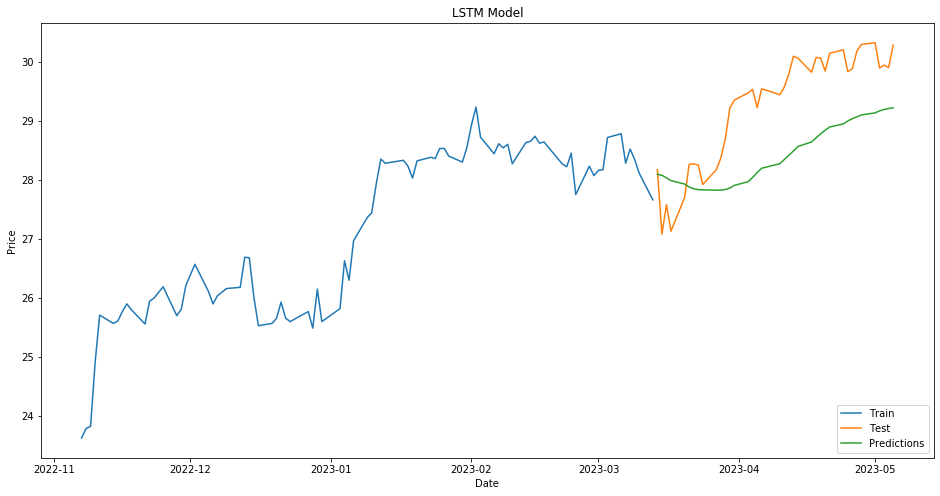

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training data
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
x_train, y_train = [], []
for i in range(60, train_size):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create testing data
test_data = scaled_data[train_size-60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

if x_train.shape[0] == 0:
    print('No training data available')
else:
    # Create LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    # Compile and fit model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Make predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error:', rmse)

    # Plot results
    train = data[:train_size]
    valid = data[train_size:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
    plt.show()


Epoch 1/50
26/26 [==============================] - 41s 2s/step - loss: 0.5393
Epoch 2/50
26/26 [==============================] - 5s 181ms/step - loss: 0.3152
Epoch 3/50
26/26 [==============================] - 5s 178ms/step - loss: 0.1413
Epoch 4/50
26/26 [==============================] - 4s 145ms/step - loss: 0.0294
Epoch 5/50
26/26 [==============================] - 3s 126ms/step - loss: 0.0175
Epoch 6/50
26/26 [==============================] - 3s 106ms/step - loss: 0.1265
Epoch 7/50
26/26 [==============================] - 3s 106ms/step - loss: 0.0474
Epoch 8/50
26/26 [==============================] - 3s 129ms/step - loss: 0.0366
Epoch 9/50
26/26 [==============================] - 3s 130ms/step - loss: 0.0202
Epoch 10/50
26/26 [==============================] - 3s 115ms/step - loss: 0.0174
Epoch 11/50
26/26 [==============================] - 4s 136ms/step - loss: 0.0195
Epoch 12/50
26/26 [==============================] - 3s 125ms/step - loss: 0.0323
Epoch 13/50
26/26 [========

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


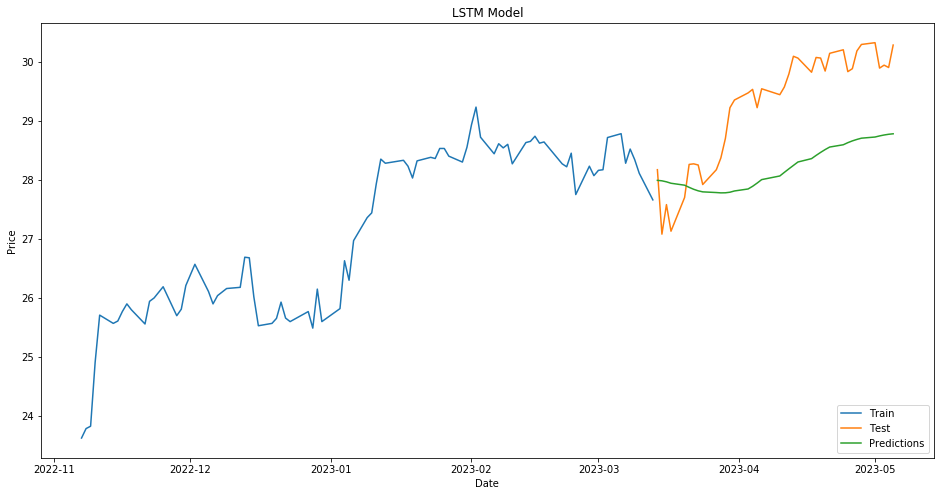

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training data
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
x_train, y_train = [], []
for i in range(60, train_size):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create testing data
test_data = scaled_data[train_size-60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and fit model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Plot results
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# Complete Working v3 predictions - Working with DAX

Epoch 1/10
26/26 [==============================] - 2s 84ms/step - loss: 0.0431
Epoch 2/10
26/26 [==============================] - 0s 266us/step - loss: 0.0104
Epoch 3/10
26/26 [==============================] - 0s 333us/step - loss: 0.0227
Epoch 4/10
26/26 [==============================] - 0s 302us/step - loss: 0.0218
Epoch 5/10
26/26 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 6/10
26/26 [==============================] - 0s 995us/step - loss: 0.0059
Epoch 7/10
26/26 [==============================] - 0s 868us/step - loss: 0.0076
Epoch 8/10
26/26 [==============================] - 0s 870us/step - loss: 0.0099
Epoch 9/10
26/26 [==============================] - 0s 802us/step - loss: 0.0081
Epoch 10/10
26/26 [==============================] - 0s 498us/step - loss: 0.0043
Root Mean Squared Error: 28.85682368910845


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


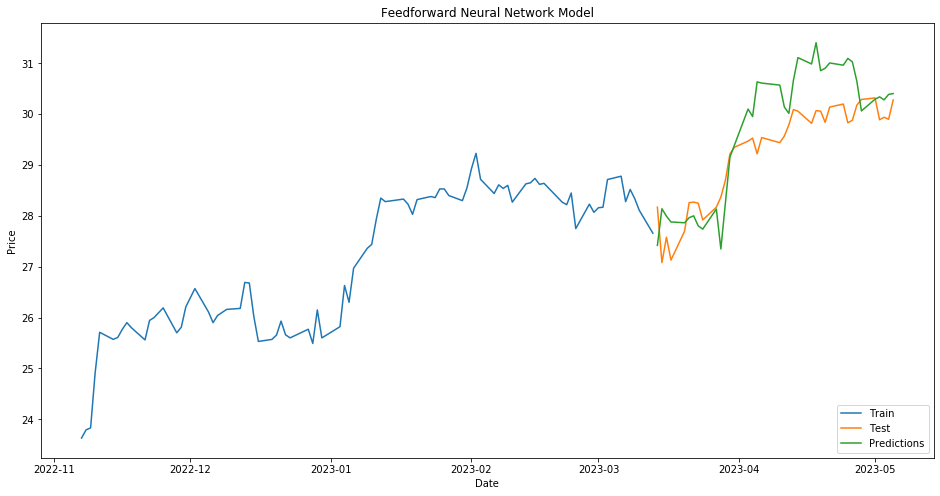

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training data
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
x_train, y_train = [], []
for i in range(60, train_size):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create testing data
test_data = scaled_data[train_size-60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for feedforward neural network model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Create feedforward neural network model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))

# Compile and fit model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Plot results
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Feedforward Neural Network Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


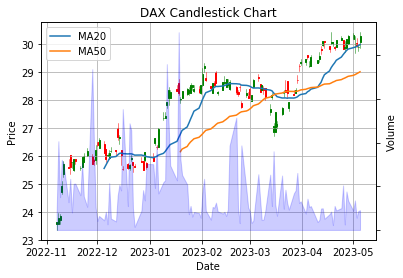

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Create candlestick chart
ohlc_data = data[['Open', 'High', 'Low', 'Close']].reset_index()
ohlc_data['Date'] = ohlc_data['Date'].apply(mdates.date2num)

fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc_data.values, width=0.6, colorup='green', colordown='red')
ax.xaxis_date()
ax.grid(True)
ax.set_title('DAX Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add volume
ax2 = ax.twinx()
ax2.fill_between(data.index.map(mdates.date2num), data['Volume'], color='blue', alpha=0.2)
ax2.axes.yaxis.set_ticklabels([])
ax2.grid(False)
ax2.set_ylabel('Volume')

# Add moving averages
ma_20 = data['Close'].rolling(window=20).mean()
ma_50 = data['Close'].rolling(window=50).mean()
ax.plot(data.index, ma_20, label='MA20')
ax.plot(data.index, ma_50, label='MA50')
ax.legend()

plt.show()


Using TensorFlow backend.


Epoch 1/10
26/26 [==============================] - 3s 128ms/step - loss: 0.6857
Epoch 2/10
26/26 [==============================] - 0s 350us/step - loss: 0.4755
Epoch 3/10
26/26 [==============================] - 0s 210us/step - loss: 0.3249
Epoch 4/10
26/26 [==============================] - 0s 534us/step - loss: 0.1894
Epoch 5/10
26/26 [==============================] - 0s 911us/step - loss: 0.0962
Epoch 6/10
26/26 [==============================] - 0s 304us/step - loss: 0.0443
Epoch 7/10
26/26 [==============================] - 0s 252us/step - loss: 0.0251
Epoch 8/10
26/26 [==============================] - 0s 475us/step - loss: 0.0332
Epoch 9/10
26/26 [==============================] - 0s 590us/step - loss: 0.0569
Epoch 10/10
26/26 [==============================] - 0s 469us/step - loss: 0.0826
Root Mean Squared Error: 31.825673142692725


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


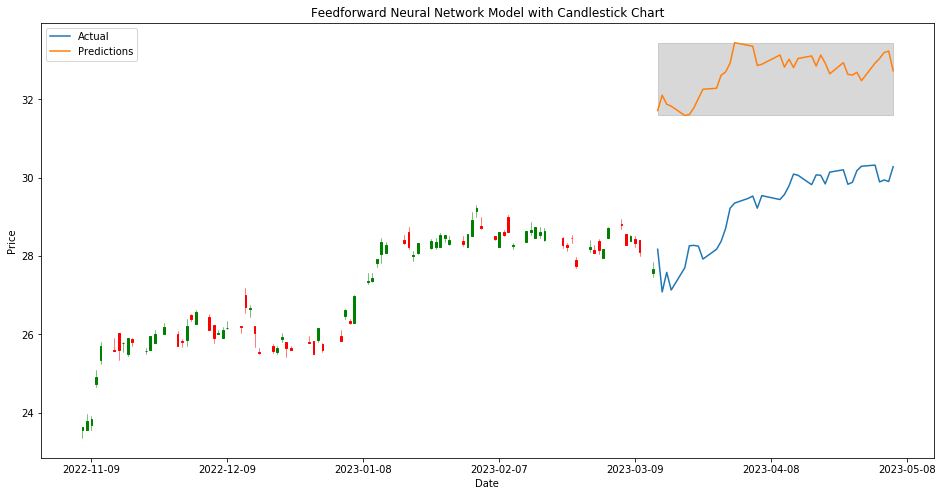

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Load data
data = pd.read_csv('DAX.csv', index_col='Date', parse_dates=True)
data.dropna(inplace=True)

# Convert date to matplotlib dates
data.index = pd.to_datetime(data.index)
data['Date'] = data.index.map(mdates.date2num)

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create training data
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
x_train, y_train = [], []
for i in range(60, train_size):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Create testing data
test_data = scaled_data[train_size-60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape data for feedforward neural network model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# Create feedforward neural network model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))

# Compile and fit model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Plot results with candlestick chart
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

fig, ax = plt.subplots(figsize=(16, 8))
candlestick_ohlc(ax, train[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.4, colorup='green', colordown='red')
ax.plot(valid['Date'], valid['Close'], label='Actual')
ax.plot(valid['Date'], valid['Predictions'], label='Predictions')
ax.fill_between(valid['Date'], valid['Predictions'].min(), valid['Predictions'].max(), alpha=0.3, color='gray')
ax.set_title('Feedforward Neural Network Model with Candlestick Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.show()
